In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
import os
import shutil
import random
from pathlib import Path
import numpy as np

n_folds = 10
batch_size=8
input_shape=[200,200,3]

In [2]:
# Set up the ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    fill_mode='nearest')


# Set up the KFold cross-validation
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [3]:
# Model definition
def create_cnn_model():
    cnn = tf.keras.models.Sequential()
    cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation ='relu', input_shape=[200,200,3]))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation ='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    cnn.add(tf.keras.layers.Flatten())
    cnn.add(tf.keras.layers.Dense(units= 256, activation = 'relu'))
    cnn.add(tf.keras.layers.Dense(units= 128, activation = 'relu'))
    cnn.add(tf.keras.layers.Dense(units= 64, activation = 'relu'))
    cnn.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

    cnn.compile(optimizer = opt, loss = 'binary_focal_crossentropy', metrics = ['accuracy'])
    cnn.summary()

    return cnn

cnn = create_cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 194, 194, 64)      9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 32)       0

Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold1
Epoch 1/8
62/62 [==============================] - 28s 422ms/step - loss: 0.1640 - accuracy: 0.6362 - val_loss: 0.1586 - val_accuracy: 0.5818
Epoch 2/8
62/62 [==============================] - 26s 416ms/step - loss: 0.1551 - accuracy: 0.6728 - val_loss: 0.1579 - val_accuracy: 0.6545
Epoch 3/8
62/62 [==============================] - 25s 404ms/step - loss: 0.1425 - accuracy: 0.7337 - val_loss: 0.1724 - val_accuracy: 0.6000
Epoch 4/8
62/62 [==============================] - 25s 404ms/step - loss: 0.1335 - accuracy: 0.7419 - val_loss: 0.1602 - val_accuracy: 0.7091
Epoch 5/8
62/62 [==============================] - 25s 403ms/step - loss: 0.1304 - accuracy: 0.7480 - val_loss: 0.1894 - val_accuracy: 0.6727
Epoch 6/8
62/62 [==============================] - 25s 404ms/step - loss: 0.1244 - accuracy: 0.7581 - val_loss: 0.1565 - val_accuracy: 0.7273
Epoch 7/8
62/62 [==============================] -

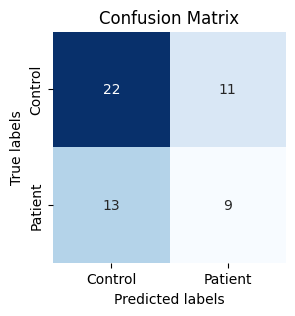

Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold2
Epoch 1/8
62/62 [==============================] - 26s 419ms/step - loss: 0.1205 - accuracy: 0.7866 - val_loss: 0.1475 - val_accuracy: 0.6545
Epoch 2/8
62/62 [==============================] - 27s 441ms/step - loss: 0.1062 - accuracy: 0.8354 - val_loss: 0.1724 - val_accuracy: 0.5818
Epoch 3/8
62/62 [==============================] - 27s 438ms/step - loss: 0.1126 - accuracy: 0.7927 - val_loss: 0.1488 - val_accuracy: 0.6000
Epoch 4/8
62/62 [==============================] - 27s 437ms/step - loss: 0.0954 - accuracy: 0.8293 - val_loss: 0.1556 - val_accuracy: 0.6182
Epoch 5/8
62/62 [==============================] - 27s 431ms/step - loss: 0.0965 - accuracy: 0.8394 - val_loss: 0.1732 - val_accuracy: 0.6000
Epoch 6/8
62/62 [==============================] - 27s 430ms/step - loss: 0.0960 - accuracy: 0.8415 - val_loss: 0.1670 - val_accuracy: 0.6545
Epoch 7/8
62/62 [==============================] -

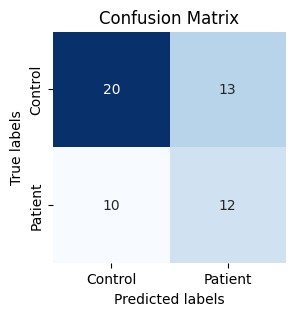

Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold3
Epoch 1/8
62/62 [==============================] - 25s 406ms/step - loss: 0.0967 - accuracy: 0.8211 - val_loss: 0.0592 - val_accuracy: 0.9091
Epoch 2/8
62/62 [==============================] - 25s 400ms/step - loss: 0.0900 - accuracy: 0.8354 - val_loss: 0.0618 - val_accuracy: 0.9273
Epoch 3/8
62/62 [==============================] - 25s 402ms/step - loss: 0.0822 - accuracy: 0.8638 - val_loss: 0.1270 - val_accuracy: 0.8545
Epoch 4/8
62/62 [==============================] - 25s 402ms/step - loss: 0.0817 - accuracy: 0.8659 - val_loss: 0.0573 - val_accuracy: 0.9273
Epoch 5/8
62/62 [==============================] - 25s 402ms/step - loss: 0.0760 - accuracy: 0.8679 - val_loss: 0.0589 - val_accuracy: 0.9091
Epoch 6/8
62/62 [==============================] - 25s 403ms/step - loss: 0.0728 - accuracy: 0.8618 - val_loss: 0.0584 - val_accuracy: 0.9273
Epoch 7/8
62/62 [==============================] -

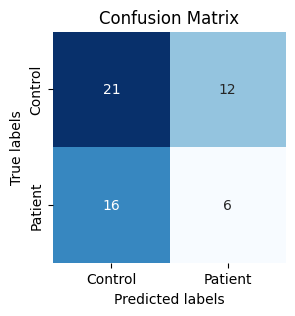

Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold4
Epoch 1/8
62/62 [==============================] - 25s 403ms/step - loss: 0.0623 - accuracy: 0.8943 - val_loss: 0.0562 - val_accuracy: 0.9273
Epoch 2/8
62/62 [==============================] - 25s 404ms/step - loss: 0.0510 - accuracy: 0.9207 - val_loss: 0.0545 - val_accuracy: 0.9091
Epoch 3/8
62/62 [==============================] - 25s 403ms/step - loss: 0.0474 - accuracy: 0.9431 - val_loss: 0.0491 - val_accuracy: 0.9636
Epoch 4/8
62/62 [==============================] - 25s 405ms/step - loss: 0.0436 - accuracy: 0.9268 - val_loss: 0.0813 - val_accuracy: 0.8545
Epoch 5/8
62/62 [==============================] - 25s 404ms/step - loss: 0.0397 - accuracy: 0.9512 - val_loss: 0.0712 - val_accuracy: 0.8909
Epoch 6/8
62/62 [==============================] - 24s 387ms/step - loss: 0.0322 - accuracy: 0.9593 - val_loss: 0.0507 - val_accuracy: 0.9455
Epoch 7/8
62/62 [==============================] -

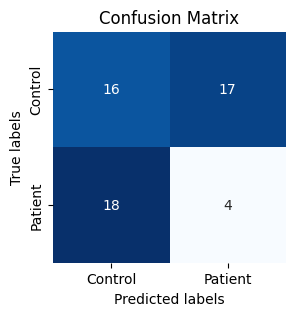

Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold5
Epoch 1/8
62/62 [==============================] - 24s 388ms/step - loss: 0.0378 - accuracy: 0.9451 - val_loss: 0.0301 - val_accuracy: 0.9818
Epoch 2/8
62/62 [==============================] - 24s 388ms/step - loss: 0.0369 - accuracy: 0.9472 - val_loss: 0.0503 - val_accuracy: 0.9091
Epoch 3/8
62/62 [==============================] - 24s 390ms/step - loss: 0.0256 - accuracy: 0.9715 - val_loss: 0.0583 - val_accuracy: 0.9091
Epoch 4/8
62/62 [==============================] - 24s 388ms/step - loss: 0.0197 - accuracy: 0.9675 - val_loss: 0.0493 - val_accuracy: 0.9273
Epoch 5/8
62/62 [==============================] - 24s 386ms/step - loss: 0.0206 - accuracy: 0.9736 - val_loss: 0.0326 - val_accuracy: 0.9818
Epoch 6/8
62/62 [==============================] - 24s 386ms/step - loss: 0.0218 - accuracy: 0.9715 - val_loss: 0.0484 - val_accuracy: 0.8909
Epoch 7/8
62/62 [==============================] -

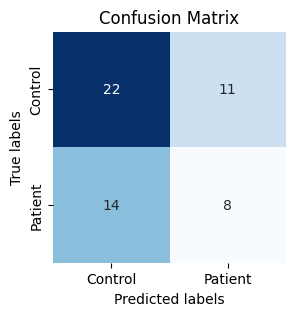

Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold6
Epoch 1/8
62/62 [==============================] - 24s 389ms/step - loss: 0.0403 - accuracy: 0.9451 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 2/8
62/62 [==============================] - 24s 386ms/step - loss: 0.0229 - accuracy: 0.9715 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 3/8
62/62 [==============================] - 24s 385ms/step - loss: 0.0181 - accuracy: 0.9776 - val_loss: 0.0255 - val_accuracy: 0.9455
Epoch 4/8
62/62 [==============================] - 24s 386ms/step - loss: 0.0243 - accuracy: 0.9614 - val_loss: 0.0280 - val_accuracy: 0.9273
Epoch 5/8
62/62 [==============================] - 24s 386ms/step - loss: 0.0152 - accuracy: 0.9797 - val_loss: 0.0604 - val_accuracy: 0.9455
Epoch 6/8
62/62 [==============================] - 24s 393ms/step - loss: 0.0165 - accuracy: 0.9837 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 7/8
62/62 [==============================] -

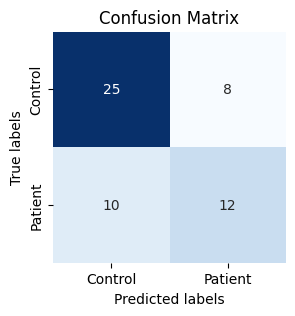

Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold7
Epoch 1/8
62/62 [==============================] - 24s 388ms/step - loss: 0.0130 - accuracy: 0.9878 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 2/8
62/62 [==============================] - 24s 385ms/step - loss: 0.0145 - accuracy: 0.9898 - val_loss: 0.0072 - val_accuracy: 0.9818
Epoch 3/8
62/62 [==============================] - 24s 388ms/step - loss: 0.0175 - accuracy: 0.9817 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 4/8
62/62 [==============================] - 24s 389ms/step - loss: 0.0212 - accuracy: 0.9756 - val_loss: 0.0158 - val_accuracy: 0.9636
Epoch 5/8
62/62 [==============================] - 24s 386ms/step - loss: 0.0166 - accuracy: 0.9776 - val_loss: 0.0118 - val_accuracy: 0.9818
Epoch 6/8
62/62 [==============================] - 24s 387ms/step - loss: 0.0162 - accuracy: 0.9797 - val_loss: 0.0085 - val_accuracy: 0.9818
Epoch 7/8
62/62 [==============================] -

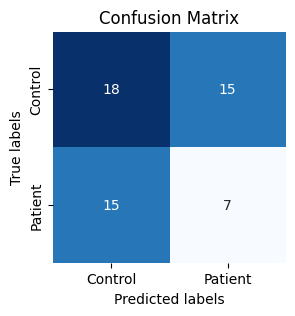

Found 492 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Training : fold8
Epoch 1/8
62/62 [==============================] - 24s 388ms/step - loss: 0.0169 - accuracy: 0.9817 - val_loss: 0.0096 - val_accuracy: 0.9818
Epoch 2/8
62/62 [==============================] - 24s 386ms/step - loss: 0.0070 - accuracy: 0.9898 - val_loss: 0.0101 - val_accuracy: 0.9818
Epoch 3/8
62/62 [==============================] - 24s 386ms/step - loss: 0.0100 - accuracy: 0.9837 - val_loss: 0.0183 - val_accuracy: 0.9636
Epoch 4/8
62/62 [==============================] - 24s 391ms/step - loss: 0.0083 - accuracy: 0.9919 - val_loss: 0.0196 - val_accuracy: 0.9455
Epoch 5/8
62/62 [==============================] - 24s 389ms/step - loss: 0.0151 - accuracy: 0.9776 - val_loss: 0.1640 - val_accuracy: 0.8909
Epoch 6/8
62/62 [==============================] - 24s 386ms/step - loss: 0.0451 - accuracy: 0.9512 - val_loss: 0.0190 - val_accuracy: 0.9818
Epoch 7/8
62/62 [==============================] -

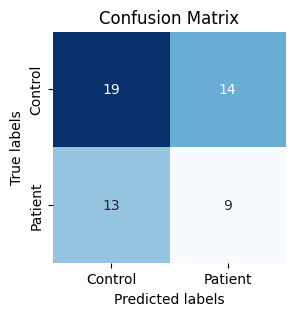

Found 493 images belonging to 2 classes.
Found 54 images belonging to 2 classes.
Training : fold9
Epoch 1/8
62/62 [==============================] - 24s 389ms/step - loss: 0.0073 - accuracy: 0.9939 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2/8
62/62 [==============================] - 24s 390ms/step - loss: 0.0109 - accuracy: 0.9838 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 3/8
62/62 [==============================] - 24s 388ms/step - loss: 0.0165 - accuracy: 0.9757 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 4/8
62/62 [==============================] - 24s 387ms/step - loss: 0.0051 - accuracy: 0.9959 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/8
62/62 [==============================] - 24s 386ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 0.9815
Epoch 6/8
62/62 [==============================] - 24s 386ms/step - loss: 0.0044 - accuracy: 0.9959 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 7/8
62/62 [==============================] -

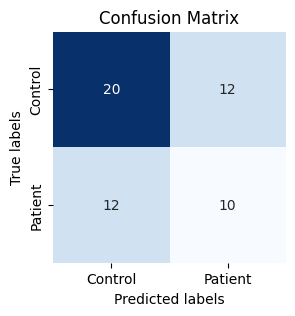

Found 494 images belonging to 2 classes.
Found 53 images belonging to 2 classes.
Training : fold10
Epoch 1/8
62/62 [==============================] - 24s 390ms/step - loss: 0.0060 - accuracy: 0.9919 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 2/8
62/62 [==============================] - 24s 388ms/step - loss: 0.0041 - accuracy: 0.9960 - val_loss: 5.0164e-04 - val_accuracy: 1.0000
Epoch 3/8
62/62 [==============================] - 24s 387ms/step - loss: 0.0043 - accuracy: 0.9960 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 4/8
62/62 [==============================] - 24s 387ms/step - loss: 0.0080 - accuracy: 0.9899 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 5/8
62/62 [==============================] - 24s 387ms/step - loss: 0.0080 - accuracy: 0.9919 - val_loss: 0.0169 - val_accuracy: 0.9623
Epoch 6/8
62/62 [==============================] - 24s 387ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 7/8
62/62 [============================

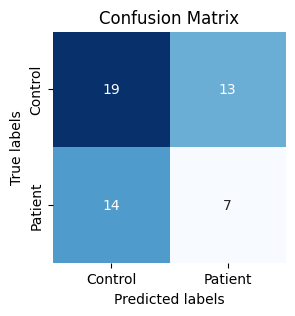

In [4]:
# Loop over the folds
for fold, (train_idx, test_idx) in enumerate(kfold.split(np.arange(n_folds))):

     # Load the data for this fold

    train_data = train_datagen.flow_from_directory(f'foldsNew/fold_{fold+1}/train', 
                                                   target_size=(200, 200), 
                                                   batch_size=batch_size, 
                                                   class_mode='binary')
    test_data = train_datagen.flow_from_directory(f'foldsNew/fold_{fold+1}/test', 
                                                 target_size=(200, 200), 
                                                 batch_size=batch_size, 
                                                 class_mode='binary')
    
    # Train the model for this fold
    print(f'Training : fold{fold+1}')
    history = cnn.fit(train_data, epochs=8, validation_data=test_data)

    ##Confusion Matrix Generator and ROC Curve
    y_pred_real = cnn.predict(test_data)
    y_pred = [int(p >= 0.5) for p in y_pred_real] ##With sigmoid 1 neuron
    y_true = test_data.classes
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(test_data.classes, y_pred)
    class_names = test_data.class_indices.keys()
    import seaborn as sns
    # Plot the confusion matrix as an image
    fig, ax = plt.subplots(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

    # Evaluate the model on the test data for this fold
    #test_loss, test_acc = cnn.evaluate(test_data)
    #print(f'Fold {fold+1} Test Loss: {test_loss}, Test Accuracy: {test_acc}')


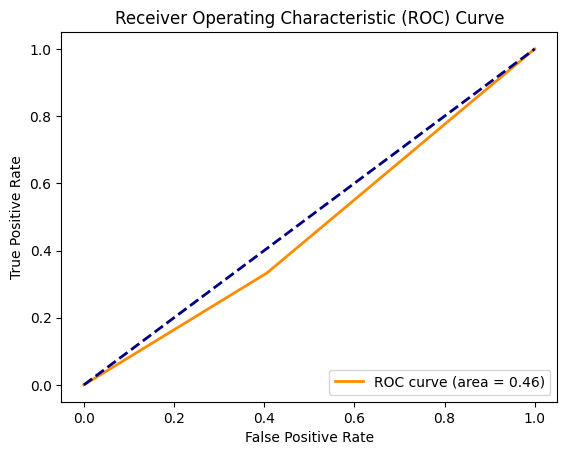

In [6]:
from sklearn.metrics import roc_curve, auc
# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()